# START plots

This artifact enables recreation of Figures 2, 6, 7, 8, 9, 10, 13, 14, 15, and 16. 

## Figure 2

Slowdown of Ideal Tracker, Hydra-C (186KB), Hydra-P (proportional storage) for thresholds of 256 to 16. 

/Users/asaxena317/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


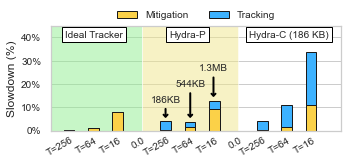

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
import matplotlib.patches as mpatches

#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Mitigation", "Tracking"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='12')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/motivation.csv", delimiter=', ')
# print (df)

# Set position of bar on X axis
#barwidth
barWidth = 0.45
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]


#Create Plot
fig = plt.figure(figsize=(5,2.5))
ax = plt.gca()

ax.fill_between(np.arange(-1,3.5, step=0.5), np.full(9, 1.61), facecolor='lightgreen', alpha=0.5)
ax.fill_between(np.arange(3,7.5, step=0.5), np.full(9, 1.61), facecolor='khaki', alpha=0.5)


#Bars
plt.bar(r1, (df['mitigation']+df['tracking']), width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r1, df['mitigation'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')


# #Y=1 Black Line
# ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*0.5) for r in range(len(df.index))], df['Config'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right',fontsize=10)

ax.tick_params(axis='x', which='major', labelsize=10)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "0.000")):
        tick.set_visible(False)


#Add Y-axes labels
plt.ylabel('Slowdown (%)', size=12)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', pad=-1, labelsize=10)
#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_ylim(0.0,0.45)
#ax.set_yticks([0.75,0.8,0.85,0.9,0.95,1])

#grid
ax.axis('on')
ax.xaxis.grid()
ax.annotate('Ideal Tracker', xy=(0, 0.1), xytext=(0.15, 0.87), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('Hydra-P', xy=(0, 0.4), xytext=(0.47, 0.87), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('Hydra-C (186 KB)', xy=(0, 0.8), xytext=(0.82, 0.87), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

ax.annotate('186KB', xy=(0.395, 0.1), xytext=(0.395, 0.25), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
ax.annotate('544KB', xy=(0.48, 0.1), xytext=(0.48, 0.4), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
ax.annotate('1.3MB', xy=(0.56, 0.3), xytext=(0.56, 0.55), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
#Legend
leg_handles=[]
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_motivation.pdf",bbox_inches='tight')
plt.show()

## Figure 6

Performance of ideal tracker, START-Static, and START-Dynamic normalized to unprotected baseline

### Figure 6-Top: TRH of 256

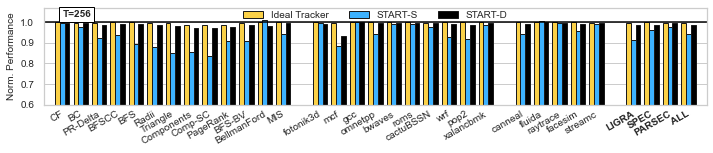

In [48]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START-S", "START-D"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_T256.csv", delimiter=r"\s+")
# print (df)

trace_order = {
    'CF': 'ligra_CF.com-lj.ungraph.gcc_6.3.0_O3.drop_184750M.length_250M_4T',
    'BC': ''
}

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.26
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(10,2.2))
ax = plt.gca()
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r3, df['start_d'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("T=256", xy=(0, 0.1), xytext=(0.05, 0.89), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*1.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Norm. Performance', size=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.6,1.07)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.6,0.7,0.8,0.9,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.92),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_t256.pdf",bbox_inches='tight')
plt.show()


### Figure 6-Bottom: TRH of 64

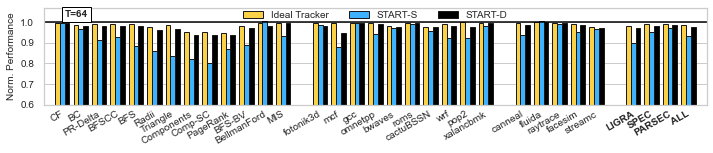

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START-S", "START-D"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_T64.csv", delimiter=r"\s+")
#print (df)

trace_order = {
    'CF': 'ligra_CF.com-lj.ungraph.gcc_6.3.0_O3.drop_184750M.length_250M_4T',
    'BC': ''
}

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.26
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(10,2.2))
ax = plt.gca()
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r3, df['start_d'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("T=64", xy=(0, 0.1), xytext=(0.05, 0.89), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*1.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Norm. Performance', size=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.6,1.07)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.6,0.7,0.8,0.9,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,3):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.92),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_t64.pdf",bbox_inches='tight')
plt.show()


## Figure 7
LLC capacity loss of START normalized to baseline.

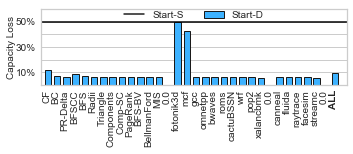

In [54]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Start-S", "Start-D"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/capacity_loss.csv", delimiter=r'\s+')
#print (df)


# Set position of bar on X axis
#barwidth
barWidth = 0.7
r1 = np.arange(len(df.index))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(5,2.2))
ax = plt.gca()


#Bars
# plt.bar(r1, df['start_s'], width = barWidth, color=colors[0],label=legends[0],edgecolor='k')
plt.bar(r1, df['start_d'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')


#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [0.5,0.5],lw=1.5,color='black')


# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*0.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 90,ha='right')

for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Capacity Loss', size=10, labelpad=-0.5)
ax.tick_params(axis='y', which='major', labelsize=10, pad=-1)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0,0.6)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax.set_yticklabels(["10%", "", "30%", "", "50%", ""])
#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
leg_handles.append(mlines.Line2D([], [], color='k',label=legends[0]))
for i in range(1,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.915),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/capacity_loss.pdf",bbox_inches='tight')
plt.show()


## Figure 8
LLC relative cache misses of START normalized to baseline.

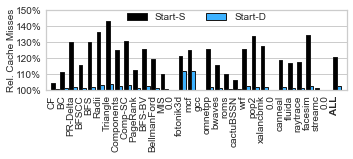

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Start-S", "Start-D"]
                               
#Color Palette
colors = ['black','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/cache_misses.csv", delimiter=r'\s+')
#print (df)


# Set position of bar on X axis
#barwidth
barWidth = 0.4
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(5,2.3))
ax = plt.gca()


#Bars
plt.bar(r1, df['start_s'], width = barWidth, color=colors[0],label=legends[0],edgecolor='k')
plt.bar(r2, df['start_d'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')


#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [0.5,0.5],lw=1.5,color='black')


# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*1) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 90,ha='right')

for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Rel. Cache Misses', size=10, labelpad=-0.7)
ax.tick_params(axis='y', which='major', labelsize=10, pad=-1)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(1, 1.5)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([1, 1.1, 1.2, 1.3, 1.4, 1.5])
# ax.set_yticklabels(["6%   \n(1-way)", "20%   ", "40%   ", "50%   \n(8-ways)", ""])
#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
# leg_handles.append(mlines.Line2D([], [], color='k',label=legends[0]))
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.91),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/cache_misses.pdf",bbox_inches='tight')
plt.show()


## Figure 9
Impact on slowdown of START as LLC size is varied.

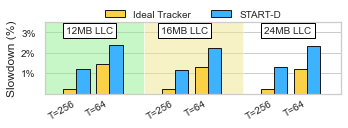

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
import matplotlib.patches as mpatches

#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START-D"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='12')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/cache_sensitivity.csv", delimiter=r'\s+')

# # Set position of bar on X axis
# #barwidth
# barWidth = 0.45
# r1 = np.arange(len(df.index))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]




#Create Plot
fig = plt.figure(figsize=(5,2))
ax = plt.gca()

ax.fill_between(np.arange(-1,2.5, step=0.25), np.full(14, 1.61), facecolor='lightgreen', alpha=0.5)
ax.fill_between(np.arange(2.25,5.5, step=0.25), np.full(13, 1.61), facecolor='khaki', alpha=0.5)

barWidth = 0.4
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

df['ideal'] = (1/df['ideal'] - 1)
df['start_d'] = (1/df['start_d'] - 1)
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
# plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r2, df['start_d'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')

# #Y=1 Black Line
# ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*0.5) for r in range(len(df.index))], df['Config'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right',fontsize=10)

ax.tick_params(axis='x', which='major', labelsize=10)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "0")):
        tick.set_visible(False)


#Add Y-axes labels
plt.ylabel('Slowdown (%)', size=12)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', pad=-1, labelsize=10)
#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_ylim(0.0,0.035)
ax.set_yticks([0.01, 0.02, 0.03])

#grid
ax.axis('on')
ax.xaxis.grid()
ax.annotate('12MB LLC', xy=(0, 0.1), xytext=(0.15, 0.82), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('16MB LLC', xy=(0, 0.4), xytext=(0.47, 0.82), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('24MB LLC', xy=(0, 0.8), xytext=(0.82, 0.82), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# ax.annotate('186KB', xy=(0.395, 0.1), xytext=(0.395, 0.25), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('544KB', xy=(0.48, 0.1), xytext=(0.48, 0.4), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('1.3MB', xy=(0.56, 0.3), xytext=(0.56, 0.55), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
#Legend
leg_handles=[]
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/cache_sensitivity.pdf",bbox_inches='tight')
plt.show()

## Figure 10
Slowdown of START at varying Blast Radius.

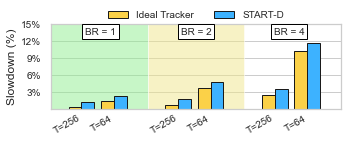

In [74]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
import matplotlib.patches as mpatches

#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START-D"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='12')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/blast_radius_sensitivity.csv", delimiter=r'\s+')

# # Set position of bar on X axis
# #barwidth
# barWidth = 0.45
# r1 = np.arange(len(df.index))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]




#Create Plot
fig = plt.figure(figsize=(5,2.2))
ax = plt.gca()

ax.fill_between(np.arange(-1,2.5, step=0.25), np.full(14, 1.61), facecolor='lightgreen', alpha=0.5)
ax.fill_between(np.arange(2.25,5.5, step=0.25), np.full(13, 1.61), facecolor='khaki', alpha=0.5)

barWidth = 0.4
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

df['ideal'] = (1/df['ideal'] - 1)
df['start_d'] = (1/df['start_d'] - 1)
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
# plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r2, df['start_d'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')

# #Y=1 Black Line
# ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*0.5) for r in range(len(df.index))], df['Config'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right',fontsize=10)

ax.tick_params(axis='x', which='major', labelsize=10)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "0")):
        tick.set_visible(False)


#Add Y-axes labels
plt.ylabel('Slowdown (%)', size=12)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', pad=-1, labelsize=10)
#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_ylim(0.0,0.15)
ax.set_yticks([0.03, 0.06, 0.09, 0.12, 0.15])

#grid
ax.axis('on')
ax.xaxis.grid()
ax.annotate('BR = 1', xy=(0, 0.1), xytext=(0.17, 0.85), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('BR = 2', xy=(0, 0.4), xytext=(0.5, 0.85), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
ax.annotate('BR = 4', xy=(0, 0.4), xytext=(0.82, 0.85), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
# ax.annotate('3MB LLC', xy=(0, 0.8), xytext=(0.82, 0.87), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# ax.annotate('186KB', xy=(0.395, 0.1), xytext=(0.395, 0.25), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('544KB', xy=(0.48, 0.1), xytext=(0.48, 0.4), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('1.3MB', xy=(0.56, 0.3), xytext=(0.56, 0.55), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
#Legend
leg_handles=[]
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,1.1),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/blast_radius_sensitivity.pdf",bbox_inches='tight')
plt.show()

## Figure 13
Performance of ideal tracker and START-M normalized to an unprotected baseline.

### Figure 13-Top: TRH of 256

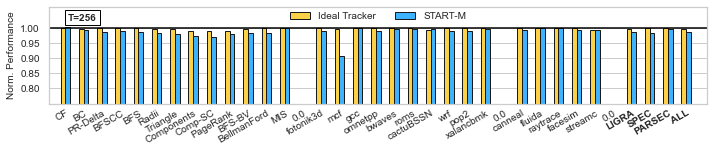

In [60]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START-M"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_m_T256.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.26
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(10,2.2))
ax = plt.gca()
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
# plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r2, df['start_m'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("T=256", xy=(0, 0.1), xytext=(0.05, 0.84), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*1.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Norm. Performance', size=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.75,1.07)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.8,0.85,0.9,0.95,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.9),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_m_t256.pdf",bbox_inches='tight')
plt.show()

### Figure 13-Bottom: TRH of 64

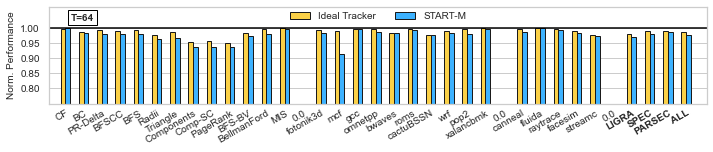

In [62]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START-M"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_m_T64.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.26
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(10,2.2))
ax = plt.gca()
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
# plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r2, df['start_m'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

ax.annotate("T=64", xy=(0, 0.1), xytext=(0.05, 0.84), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom', weight='bold',
            bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*1.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Norm. Performance', size=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.75,1.07)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.8,0.85,0.9,0.95,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.9),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_m_t64.pdf",bbox_inches='tight')
plt.show()

## Figure 14
LLC capacity loss of START normalized to baseline.

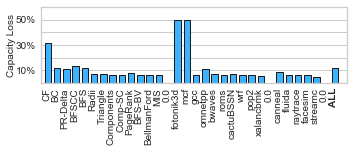

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Start-S", "Start-D"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','black', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_m_cap_loss.csv", delimiter=r'\s+')
#print (df)


# Set position of bar on X axis
#barwidth
barWidth = 0.7
r1 = np.arange(len(df.index))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]

#Create Plot
fig = plt.figure(figsize=(5,2.2))
ax = plt.gca()


#Bars
# plt.bar(r1, df['start_s'], width = barWidth, color=colors[0],label=legends[0],edgecolor='k')
plt.bar(r1, df['start_m'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')


#Y=1 Black Line
# ax.plot([-0.75,len(df.index)+0.25], [0.5,0.5],lw=1.5,color='black')


# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*0.5) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 90,ha='right')

for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "LIGRA") or (tick_str == "SPEC") or (tick_str == "PARSEC") or (tick_str == "ALL")):
        tick.label1.set_weight('bold')
    if (tick_str == "0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Capacity Loss', size=10, labelpad=-0.5)
ax.tick_params(axis='y', which='major', labelsize=10, pad=-1)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0,0.6)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
ax.set_yticklabels(["10%", "", "30%", "", "50%", ""])
#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
# leg_handles.append(mlines.Line2D([], [], color='k',label=legends[0]))
# for i in range(1,2):
#     leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
# plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.915),frameon=False,loc='center',ncol=4,prop={'size':10})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_m_cap_loss.pdf",bbox_inches='tight')
plt.show()


## Figure 15
Scalability of START at current threshold of 4K to extreme threshold of 16.

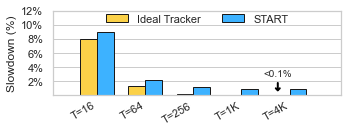

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
import matplotlib.patches as mpatches

#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Ideal Tracker", "START"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF', '#34a853']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='12')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/threshold_sensitivity.csv", delimiter=r'\s+')

# # Set position of bar on X axis
# #barwidth
# barWidth = 0.45
# r1 = np.arange(len(df.index))
# r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]




#Create Plot
fig = plt.figure(figsize=(5,2))
ax = plt.gca()

# ax.fill_between(np.arange(-1,2.5, step=0.25), np.full(14, 1.61), facecolor='lightgreen', alpha=0.5)
# ax.fill_between(np.arange(2.25,5.5, step=0.25), np.full(13, 1.61), facecolor='khaki', alpha=0.5)

barWidth = 0.35
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

df['ideal'] = (1/df['ideal'] - 1)
df['start_d'] = (1/df['start_d'] - 1)
#Bars
plt.bar(r1, df['ideal'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
# plt.bar(r2, df['start_s'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')
plt.bar(r2, df['start_d'], width = barWidth, color=colors[1],label=legends[1],edgecolor='k')

# #Y=1 Black Line
# ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*0.5) for r in range(len(df.index))], df['Threshold'])
ax.set_xlim(-0.75,len(df.index)+0.25)
plt.xticks(rotation = 30,ha='right')

ax.tick_params(axis='x', which='major')
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if( (tick_str == "0")):
        tick.set_visible(False)


#Add Y-axes labels
plt.ylabel('Slowdown (%)', size=12)
ax.tick_params(axis='y', which='major')
ax.tick_params(axis='x', which='major', pad=-1)
#Set Y format & limts
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 0))
ax.set_ylim(0.0,0.12)
ax.set_yticks([0.02, 0.04, 0.06, 0.08, 0.1, 0.12])

#grid
ax.axis('on')
ax.xaxis.grid()

ax.annotate('<0.1%', xy=(0.78, 0.02), xytext=(0.78, 0.2), xycoords='axes fraction',
            fontsize=10, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))

# ax.annotate('12MB LLC', xy=(0, 0.1), xytext=(0.15, 0.82), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
# ax.annotate('16MB LLC', xy=(0, 0.4), xytext=(0.47, 0.82), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))
# ax.annotate('24MB LLC', xy=(0, 0.8), xytext=(0.82, 0.82), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# ax.annotate('186KB', xy=(0.395, 0.1), xytext=(0.395, 0.25), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('544KB', xy=(0.48, 0.1), xytext=(0.48, 0.4), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
# ax.annotate('1.3MB', xy=(0.56, 0.3), xytext=(0.56, 0.55), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom',
#             arrowprops=dict(arrowstyle='->, head_length=0.2, head_width=0.2', color='black', lw=2.0))
#Legend
leg_handles=[]
for i in range(0,2):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.9),frameon=False,loc='center',ncol=4)

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/threshold_sensitivity.pdf",bbox_inches='tight')
plt.show()

## Figure 16
Performance of START, Hydra, and Ideal trackers normalized to unprotected baseline at TRH of 64 for single and mix  8-core workload configurations. 

### Figure 16-Top: Same workload runs on all 8 cores

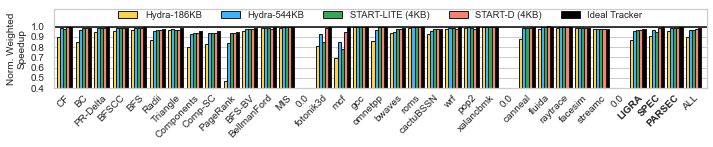

In [67]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Hydra-186KB", "Hydra-544KB", "START-LITE (4KB)", "START-D (4KB)", "Ideal Tracker"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF','#34a853', 'salmon','black']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_lite_single_T64.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.165

r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#Create Plot
fig = plt.figure(figsize=(10,2.1))
ax = plt.gca()
#Bars
plt.bar(r1, df['hydra_c'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['hydra_p'], width = barWidth, color=colors[1], label=legends[1],edgecolor='k')
plt.bar(r3, df['start_lite'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')
plt.bar(r4, df['start_d'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
plt.bar(r5, df['ideal'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# ax.annotate("T=64", xy=(0, 0.1), xytext=(0.05, 0.89), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom', weight='bold',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
plt.xticks([(r+barWidth*4) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.25,len(df.index)+0.05)
plt.xticks(rotation = 45,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if ((tick_str == "LIGRA") or (tick_str == "SPEC") or \
       (tick_str == "PARSEC") or (tick_str == "CLOUD") or \
        (tick_str == "MIX-ALL") or (tick_str == "ALL-28")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Norm. Weighted\nSpeedup', size=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.4,1.17)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.4, 0.5, 0.6,0.7,0.8,0.9,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,5):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.92),frameon=False,loc='center',ncol=6,prop={'size':9.5})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_lite_single_t64.pdf",bbox_inches='tight')
plt.show()


### Figure 16-Bottom: 8 mixed workloads run on 8 cores

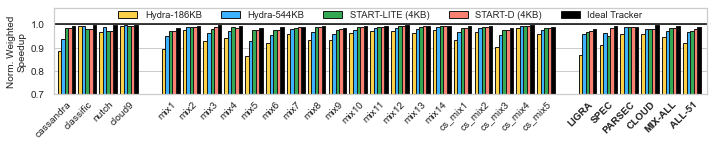

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
sns.set_style("whitegrid")
import matplotlib.ticker as mtick
import matplotlib
import matplotlib.patches as mpatches
matplotlib.ticker._mathdefault = lambda x: '\\mathdefault{%s}'%x
#Get Non-Type-3 Fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

legends = ["Hydra-186KB", "Hydra-544KB", "START-LITE (4KB)", "START-D (4KB)", "Ideal Tracker"]
                               
#Color Palette
colors = ['#FBD148','#3DB2FF', '#34a853', 'salmon','black']

#Set Font Size
#plt.rc('font', family='serif')
plt.rc('font', size='9.5')

# Read Dataframe
df = pd.read_csv("../stat_scripts/data/start_lite_mix_T64.csv", delimiter=r'\s+')
#print (df)

# Format for Slowdown (%) ensure 0s stay 0s.
# for i in ['4K','2K','1K']:
#     slowdown_df = df.copy()
#     slowdown_df.loc[slowdown_df[i] == 0, i] = 1
#     slowdown_df[i] = slowdown_df[i]-1
# print (slowdown_df)

# Set position of bar on X axis
#barwidth
barWidth = 0.17
r1 = np.arange(len(df.index))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#Create Plot
fig = plt.figure(figsize=(10,2.1))
ax = plt.gca()
#Bars
plt.bar(r1, df['hydra_c'], width = barWidth, color=colors[0], label=legends[0],edgecolor='k')
plt.bar(r2, df['hydra_p'], width = barWidth, color=colors[1], label=legends[1],edgecolor='k')
# plt.bar(r3, df['start_s'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')
plt.bar(r3, df['start_lite'], width = barWidth, color=colors[2],label=legends[2],edgecolor='k')
plt.bar(r4, df['start_d'], width = barWidth, color=colors[3],label=legends[3],edgecolor='k')
plt.bar(r5, df['ideal'], width = barWidth, color=colors[4],label=legends[4],edgecolor='k')

#Y=1 Black Line
ax.plot([-0.75,len(df.index)+0.25], [1,1],lw=1.5,color='black')

# ax.annotate("T=64", xy=(0, 0.1), xytext=(0.05, 0.89), xycoords='axes fraction',
#             fontsize=10, ha='center', va='bottom', weight='bold',
#             bbox=dict(boxstyle='square', fc='white', edgecolor='black'))

# Add xticks on the middle of the group bars
# df.at[34,'Expts'] = " "
plt.xticks([(r+barWidth*4) for r in range(len(df.index))], df['workload'])
ax.set_xlim(-0.25,len(df.index)+0.05)
plt.xticks(rotation = 45,ha='right')

ax.tick_params(axis='x', which='major', labelsize=8)
for tick in ax.xaxis.get_major_ticks():
    tick_str = tick.label1.get_text()
    if ((tick_str == "LIGRA") or (tick_str == "SPEC") or \
       (tick_str == "PARSEC") or (tick_str == "CLOUD") or \
        (tick_str == "MIX-ALL") or (tick_str == "ALL-51")):
        tick.label1.set_weight('bold')
    if (tick_str == "0" or tick_str == "0.0"):
        tick.set_visible(False)

#Add Y-axes labels
plt.ylabel('Norm. Weighted\nSpeedup', size=10)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.tick_params(axis='x', which='major', labelsize=10)

#Set Y format & limts
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,0))
ax.set_ylim(0.7,1.07)
ax.tick_params(axis='x', which='major', pad=-1)
ax.set_yticks([0.7,0.8,0.9,1])

#grid
ax.axis('on')
ax.xaxis.grid()

#Legend
leg_handles=[]
for i in range(0,5):
    leg_handles.append(mpatches.Patch(facecolor=colors[i], lw=1, label=legends[i], edgecolor='k'))
plt.legend(handles = leg_handles, bbox_to_anchor=(0.5,0.92),frameon=False,loc='center',ncol=6,prop={'size':9.5})

#Text
#ax.text(35,1.1, 'Gmean', family='serif',size='9.5',weight='bold',
#        ha='center', va='center')


#Figure
plt.tight_layout()
fig.savefig("../plot_pdfs/start_lite_mix_t64.pdf",bbox_inches='tight')
plt.show()
